<a href="https://colab.research.google.com/github/demoleiwang/DailyCodeRepo/blob/master/Courses/IS713/01_2_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

References:

[1] https://blog.csdn.net/qtlyx/article/details/52243157

In [9]:
!gdown --id '1R3WEOHNTkltRX1GaqILnMGDKdsZFtnWe' --output CPS2015.xlsx

Downloading...
From: https://drive.google.com/uc?id=1R3WEOHNTkltRX1GaqILnMGDKdsZFtnWe
To: /content/CPS2015.xlsx
100% 157k/157k [00:00<00:00, 56.5MB/s]


In [10]:
!ls

CPS2015.xlsx  sample_data


Read the data with xlsx format 

In [46]:
import pandas as pd
data = pd.read_excel("CPS2015.xlsx")

In [12]:
data

,year,ahe,bachelor,female,age
0,2015,11.778846,0,0,26
1,2015,9.615385,0,1,33
2,2015,12.019231,0,0,31
3,2015,18.376068,0,0,32
4,2015,41.836735,0,0,28
...,...,...,...,...,...
7093,2015,96.153847,1,0,25
7094,2015,30.769230,1,0,34
7095,2015,9.230769,0,0,27
7096,2015,13.653846,1,1,27


One example from https://stackoverflow.com/questions/19991445/run-an-ols-regression-with-pandas-data-frame about how to use ols to solve problem

In [13]:
import statsmodels.formula.api as sm
df = pd.DataFrame({"A": [10,20,30,40,50], "B": [20, 30, 10, 40, 50], "C": [32, 234, 23, 23, 42523]})
result = sm.ols(formula="A ~ B + C", data=df).fit()
print(result.params)
print(result.summary())

Intercept    14.952480
B             0.401182
C             0.000352
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      A   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     1.375
Date:                Mon, 14 Sep 2020   Prob (F-statistic):              0.421
Time:                        06:00:18   Log-Likelihood:                -18.178
No. Observations:                   5   AIC:                             42.36
Df Residuals:                       2   BIC:                             41.19
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


We refer to the url https://www.statsmodels.org/dev/example_formulas.html about the R-style formulas 

In [76]:
# (1)
import statsmodels.formula.api as sm
result_b = sm.ols(formula="ahe ~ age + female + bachelor", data=data).fit()
print(result_b.params)
print(result_b.summary())
print ("f_pvalue:", result_b.f_pvalue)


Intercept    2.044810
age          0.531275
female      -4.143538
bachelor     9.845644
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    ahe   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     553.4
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          3.46e-323
Time:                        10:11:35   Log-Likelihood:                -27036.
No. Observations:                7098   AIC:                         5.408e+04
Df Residuals:                    7094   BIC:                         5.411e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [80]:
np.sqrt(result_b.scale)

10.916795685079903

In [39]:
# (2)
import numpy as np
import statsmodels.formula.api as sm
result_c = sm.ols(formula="np.log(ahe) ~ age + female + bachelor", data=data).fit()
print(result_c.params)
print(result_c.summary())

Intercept    2.027359
age          0.024191
female      -0.177622
bachelor     0.461503
dtype: float64
                            OLS Regression Results                            
Dep. Variable:            np.log(ahe)   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     622.4
Date:                Mon, 14 Sep 2020   Prob (F-statistic):               0.00
Time:                        07:55:30   Log-Likelihood:                -4821.9
No. Observations:                7098   AIC:                             9652.
Df Residuals:                    7094   BIC:                             9679.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [17]:
np.exp(0.024191)

1.0244859760260958

In [40]:
# (3)
import numpy as np
import statsmodels.formula.api as sm
result_d = sm.ols(formula="np.log(ahe) ~ np.log(age) + female + bachelor", data=data).fit()
print(result_d.params)
print(result_d.summary())

Intercept      0.323253
np.log(age)    0.715375
female        -0.177531
bachelor       0.461524
dtype: float64
                            OLS Regression Results                            
Dep. Variable:            np.log(ahe)   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     623.4
Date:                Mon, 14 Sep 2020   Prob (F-statistic):               0.00
Time:                        07:55:39   Log-Likelihood:                -4820.8
No. Observations:                7098   AIC:                             9650.
Df Residuals:                    7094   BIC:                             9677.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [20]:
print (np.exp(0.715375*np.log(26)) - np.exp(0.715375*np.log(25)))
print (np.exp(0.715375*np.log(34)) - np.exp(0.715375*np.log(33)))

0.2845820061507389
0.26331389471153344


In [79]:
print (0.715375*np.log(26) - 0.715375*np.log(25))

0.028057517672028798


In [41]:
# (4)
import numpy as np
import statsmodels.formula.api as sm
result_e = sm.ols(formula="np.log(ahe) ~ age + np.power(age,2) + female + bachelor", data=data).fit()
print(result_e.params)
print(result_e.summary())

Intercept           0.418745
age                 0.134115
np.power(age, 2)   -0.001860
female             -0.177364
bachelor            0.461629
dtype: float64
                            OLS Regression Results                            
Dep. Variable:            np.log(ahe)   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     468.6
Date:                Mon, 14 Sep 2020   Prob (F-statistic):               0.00
Time:                        07:55:52   Log-Likelihood:                -4819.1
No. Observations:                7098   AIC:                             9648.
Df Residuals:                    7093   BIC:                             9682.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t 

In [22]:
print (np.exp(0.134115*26-0.001860*np.power(26,2)) - np.exp(0.134115*25-0.001860*np.power(25,2)))
print (np.exp(0.134115*26-0.001860*np.power(34,2)) - np.exp(0.134115*25-0.001860*np.power(33,2)))

0.3578613175790313
0.035975983855859095


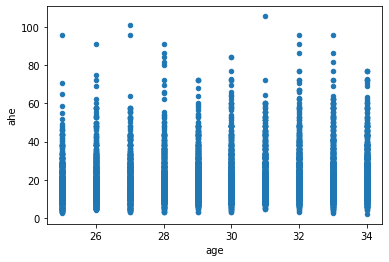

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

data.plot.scatter(x='age', y='ahe')

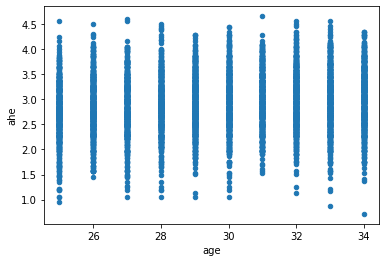

In [32]:
data_x = data.copy()
# data_x['age'] = np.log(data_x['age'])
data_x['ahe'] = np.log(data_x['ahe'])
data_x.plot.scatter(x='age', y='ahe')

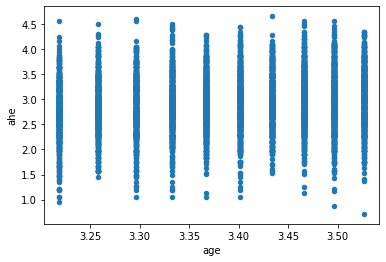

In [33]:
data_x = data.copy()
data_x['age'] = np.log(data_x['age'])
data_x['ahe'] = np.log(data_x['ahe'])
data_x.plot.scatter(x='age', y='ahe')

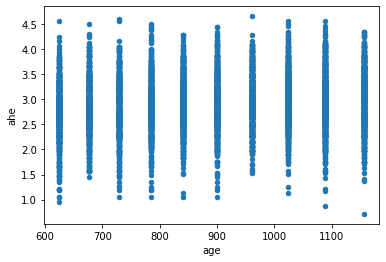

In [34]:
data_x = data.copy()
data_x['age'] = np.power(data_x['age'],2)
data_x['ahe'] = np.log(data_x['ahe'])
data_x.plot.scatter(x='age', y='ahe')

In [26]:
data

,year,ahe,bachelor,female,age
0,2015,11.778846,0,0,26
1,2015,9.615385,0,1,33
2,2015,12.019231,0,0,31
3,2015,18.376068,0,0,32
4,2015,41.836735,0,0,28
...,...,...,...,...,...
7093,2015,96.153847,1,0,25
7094,2015,30.769230,1,0,34
7095,2015,9.230769,0,0,27
7096,2015,13.653846,1,1,27


In [27]:
data_x

,year,ahe,bachelor,female,age
0,2015,11.778846,0,0,676
1,2015,9.615385,0,1,1089
2,2015,12.019231,0,0,961
3,2015,18.376068,0,0,1024
4,2015,41.836735,0,0,784
...,...,...,...,...,...
7093,2015,96.153847,1,0,625
7094,2015,30.769230,1,0,1156
7095,2015,9.230769,0,0,729
7096,2015,13.653846,1,1,729


In [35]:
data.bachelor.unique()

array([0, 1])

,year,ahe,bachelor,female,age
0,2015,11.778846,0,0,26
2,2015,12.019231,0,0,31
3,2015,18.376068,0,0,32
4,2015,41.836735,0,0,28
6,2015,13.461538,0,0,34
...,...,...,...,...,...
7080,2015,11.500000,0,0,32
7083,2015,23.076923,0,0,25
7090,2015,15.384615,0,0,31
7092,2015,16.826923,0,0,26


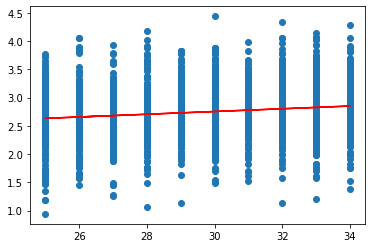

In [47]:
data_x = data.copy()
data_x = data_x[(data_x.bachelor==0)&(data_x.female==0)]
X = data_x.age.to_numpy()
Y = np.log(data_x.ahe).to_numpy()
import matplotlib.pyplot as plt
plt.scatter(X, Y)
Y_pred = result_c.predict(data_x).to_numpy()
plt.plot(X, Y_pred, color='red')
plt.show()

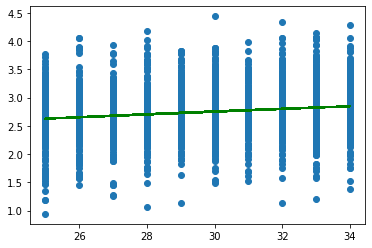

In [48]:
X = data_x.age.to_numpy()
Y = np.log(data_x.ahe).to_numpy()
import matplotlib.pyplot as plt
plt.scatter(X, Y)
Y_pred = result_d.predict(data_x).to_numpy()
plt.plot(X, Y_pred, color='green')
plt.show()

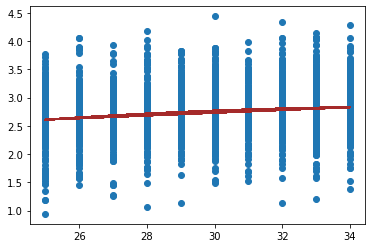

In [50]:
data_x = data.copy()
data_x = data_x[(data_x.bachelor==0)&(data_x.female==0)]
data_x
X = data_x.age.to_numpy()
Y = np.log(data_x.ahe).to_numpy()
import matplotlib.pyplot as plt
plt.scatter(X, Y)
Y_pred = result_e.predict(data_x).to_numpy()
plt.plot(X, Y_pred, color='brown')
plt.show()

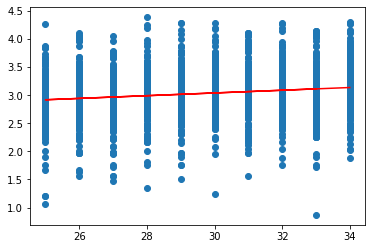

In [51]:
data_x = data.copy()
data_x = data_x[(data_x.bachelor==1)&(data_x.female==1)]
X = data_x.age.to_numpy()
Y = np.log(data_x.ahe).to_numpy()
import matplotlib.pyplot as plt
plt.scatter(X, Y)
Y_pred = result_c.predict(data_x).to_numpy()
plt.plot(X, Y_pred, color='red')
plt.show()

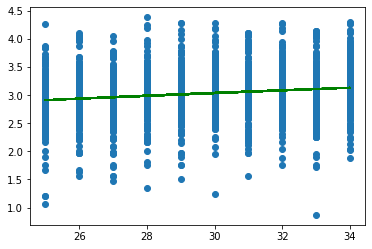

In [52]:
data_x = data.copy()
data_x = data_x[(data_x.bachelor==1)&(data_x.female==1)]
X = data_x.age.to_numpy()
Y = np.log(data_x.ahe).to_numpy()
import matplotlib.pyplot as plt
plt.scatter(X, Y)
Y_pred = result_d.predict(data_x).to_numpy()
plt.plot(X, Y_pred, color='green')
plt.show()

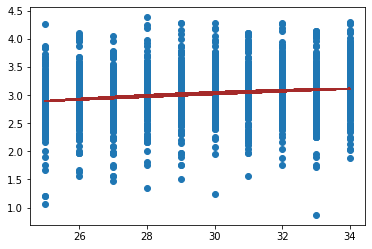

In [53]:
data_x = data.copy()
data_x = data_x[(data_x.bachelor==1)&(data_x.female==1)]
X = data_x.age.to_numpy()
Y = np.log(data_x.ahe).to_numpy()
import matplotlib.pyplot as plt
plt.scatter(X, Y)
Y_pred = result_e.predict(data_x).to_numpy()
plt.plot(X, Y_pred, color='brown')
plt.show()

In [45]:
data_x

,year,ahe,bachelor,female,age
7,2015,25.641026,1,1,33
9,2015,16.025640,1,1,33
11,2015,23.076923,1,1,30
14,2015,12.980769,1,1,30
20,2015,3.846154,1,1,28
...,...,...,...,...,...
7077,2015,14.615385,1,1,29
7085,2015,31.250000,1,1,31
7091,2015,5.769231,1,1,29
7096,2015,13.653846,1,1,27


In [83]:
# (5)
import numpy as np
import statsmodels.formula.api as sm
result = sm.ols(formula="np.log(ahe) ~ age + np.power(age,2) + female + bachelor + female * bachelor", data=data).fit()
print(result.params)
print(result.summary())

Intercept           0.411904
age                 0.134815
np.power(age, 2)   -0.001871
female             -0.190324
bachelor            0.452114
female:bachelor     0.023474
dtype: float64
                            OLS Regression Results                            
Dep. Variable:            np.log(ahe)   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     375.1
Date:                Mon, 14 Sep 2020   Prob (F-statistic):               0.00
Time:                        10:46:34   Log-Likelihood:                -4818.5
No. Observations:                7098   AIC:                             9649.
Df Residuals:                    7092   BIC:                             9690.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     

In [55]:
0.134815*30 + (-0.001871)*30*30 + (-0.190324) + 0.452114 + 0.023474

2.6458139999999997

In [56]:
0.134815*30 + (-0.001871)*30*30 + (-0.190324) 

2.1702259999999995

In [57]:
2.6458139999999997 - 2.1702259999999995

0.4755880000000001

In [58]:
0.134815*30 + (-0.001871)*30*30 + 0.452114

2.8126639999999994

In [59]:
0.134815*30 + (-0.001871)*30*30 

2.3605499999999995

In [60]:
2.8126 - 2.3605

0.45210000000000017

In [84]:
# (6)
import numpy as np
import statsmodels.formula.api as sm
result = sm.ols(formula="np.log(ahe) ~ age  + female * age", data=data).fit()
print(result.params)
print(result.summary())

Intercept     2.053703
age           0.030499
female        0.314106
female:age   -0.014263
dtype: float64
                            OLS Regression Results                            
Dep. Variable:            np.log(ahe)   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     71.51
Date:                Mon, 14 Sep 2020   Prob (F-statistic):           1.48e-45
Time:                        10:50:09   Log-Likelihood:                -5545.5
No. Observations:                7098   AIC:                         1.110e+04
Df Residuals:                    7094   BIC:                         1.113e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------

In [89]:
np.sqrt(result.scale)

0.47743892425267975

In [86]:
# (6)
import numpy as np
import statsmodels.formula.api as sm
result = sm.ols(formula="np.log(ahe) ~ bachelor * age", data=data).fit()
print(result.params)
print(result.summary())

Intercept       2.051082
bachelor        0.222390
age             0.021355
bachelor:age    0.007190
dtype: float64
                            OLS Regression Results                            
Dep. Variable:            np.log(ahe)   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     528.6
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          4.60e-310
Time:                        10:50:57   Log-Likelihood:                -4935.2
No. Observations:                7098   AIC:                             9878.
Df Residuals:                    7094   BIC:                             9906.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------

In [68]:
result.pvalues

Intercept       6.900691e-119
bachelor         6.252124e-02
age              2.665476e-13
bachelor:age     7.301964e-02
dtype: float64

In [88]:
import numpy as np
import statsmodels.formula.api as sm
result = sm.ols(formula="np.log(ahe) ~ age + female + bachelor", data=data).fit()
print(result.params)
print(result.summary())

Intercept    2.027359
age          0.024191
female      -0.177622
bachelor     0.461503
dtype: float64
                            OLS Regression Results                            
Dep. Variable:            np.log(ahe)   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     622.4
Date:                Mon, 14 Sep 2020   Prob (F-statistic):               0.00
Time:                        10:52:44   Log-Likelihood:                -4821.9
No. Observations:                7098   AIC:                             9652.
Df Residuals:                    7094   BIC:                             9679.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [75]:
data_age = data.copy()
data_age = data_age [ data_age.age < 30]
import numpy as np
import statsmodels.formula.api as sm
result = sm.ols(formula="np.log(ahe) ~ age + female + bachelor", data=data_age).fit()
print(result.params)
print(result.summary())

Intercept    1.744160
age          0.034629
female      -0.151653
bachelor     0.442525
dtype: float64
                            OLS Regression Results                            
Dep. Variable:            np.log(ahe)   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     254.7
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          4.43e-149
Time:                        10:00:15   Log-Likelihood:                -2306.0
No. Observations:                3404   AIC:                             4620.
Df Residuals:                    3400   BIC:                             4645.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------